In [ ]:
!pip install tensorflow


In [ ]:
!pip install keras

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 21.0683 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 88ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 95ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000

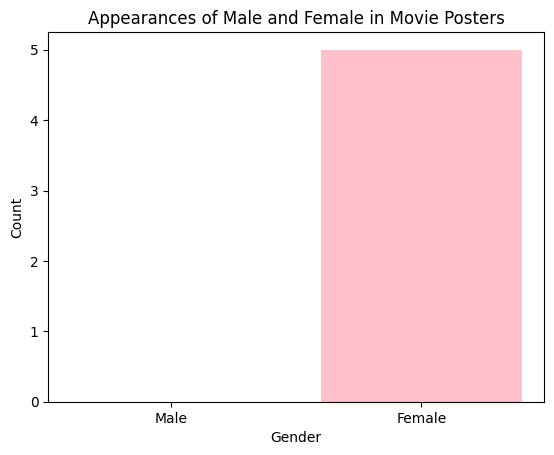

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# I've definerd a function to load data and extract features
def load_data(data_dir):
    X, y = [], []
    for filename in os.listdir(data_dir):
        if filename.endswith('.jpg'):
            image_path = os.path.join(data_dir, filename)
            X.append(extract_features(image_path))
            label = filename.split('_')[0]  # I'm assuming file names are labeled as 'male_123.jpg' or 'female_456.jpg' for testing
            if label == 'male':
                y.append(0)  # I'm assigning 0 for male
            else:
                y.append(1)  # I'm assigning 1 for female
    return np.array(X), np.array(y)

# I'm extracting features using CV from images
def extract_features(image_path):
    img = cv2.imread(image_path)
    #I'm converting to gray scale to increase sensitivity
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray, (150, 150))
    # Flatten the image
    flattened_img = resized_img.flatten()
    return flattened_img

# I'm using supervised learning
data_dir = '/content/drive/MyDrive/Bollywood-Data-master/images-data/dir_004'  # My drive path to the images directory, I'm using one directory fro testing
X, y = load_data(data_dir)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 150, 150, 1)
X_test = X_test.reshape(X_test.shape[0], 150, 150, 1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Predicting on test set (I've not talen the complete data set yet due to limited comutation power)
y_pred = model.predict(X_test)

male_count = np.sum(y_pred < 0.5)
female_count = np.sum(y_pred >= 0.5)

labels = ['Male', 'Female']
counts = [male_count, female_count]

plt.bar(labels, counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Appearances of Male and Female in Movie Posters')
plt.show()


# New Section